In [2]:
import pandas as pd
data = pd.read_csv('bajri1.csv', index_col=0)
data.head()

,modal
Date,
2015-01-01,1405
2015-01-02,1109
2015-01-03,1240
2015-01-04,1317
2015-01-05,1320


In [3]:
data.index = pd.to_datetime(data.index)

In [4]:
data.columns = ['Price']

In [5]:
import plotly.plotly as ply
import cufflinks as cf

data.iplot(title='Bajri Prices from 2015-01-01 to 2018-12-31')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~rushikhot05/0 or inside your plot.ly account where it is named 'Bajri Prices from 2015-01-01 to 2018-12-31'


/home/rushikesh/.local/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [6]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multicaptive')
fig = result.plot()
plot_mpl(fig)

'https://plot.ly/~rushikhot05/6'

In [7]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
%matplotlib inline

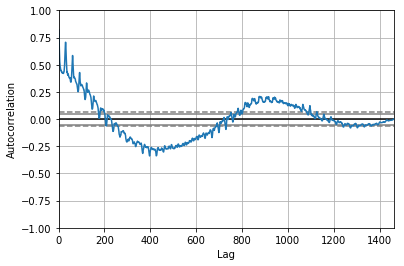

In [8]:
autocorrelation_plot(data)
pyplot.show()
# p value can be 180

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

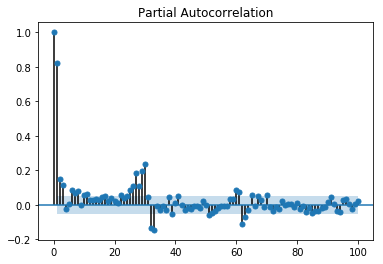

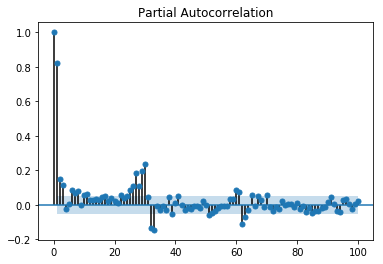

In [ ]:
plot_pacf(data, lags=100)

In [ ]:
#value of d canbe 1 or 2
#value of q can be 100


In [ ]:
from pyramid.arima import auto_arima

stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=30,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(stepwise_model.aic())

/home/rushikesh/.local/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 30); AIC=17295.654, BIC=17321.982, Fit time=56.870 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 30); AIC=18169.631, BIC=18180.162, Fit time=1.585 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 30); AIC=17718.736, BIC=17739.797, Fit time=17.431 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 30); AIC=17406.357, BIC=17427.418, Fit time=27.429 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 30); AIC=17225.121, BIC=17256.714, Fit time=82.308 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 30); AIC=17485.846, BIC=17512.173, Fit time=47.446 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 30); AIC=17222.406, BIC=17259.264, Fit time=196.639 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 30); AIC=17319.669, BIC=17351.261, Fit time=99.325 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 30); AIC=17210.774, BIC=17252.898, Fit time=203.300 seconds


In [ ]:
train = data.loc['2015-01-01':'2018-06-30']
test = data.loc['2018-07-01':]